In [35]:
import iris
import numpy as np
from netCDF4 import Dataset
import pylab as plt
import pandas as pd
from scipy.stats import lognorm, kstest, normaltest


In [36]:
confer_data = np.loadtxt('confer_snowdepth_salinity.csv', delimiter=',')

In [37]:
# get ist column and second column to snow salinty and snow depth data
confer_sp = confer_data[:,0]

confer_sd = confer_data[:,1]

# Add Mcfarlane et al data 

In [38]:
new_data = pd.read_excel('SnowSalinity_markus/MOSAiC_snowpits_13_salinity_data.xlsx')
salinity_new = new_data[new_data.columns[13]].values

# output names of all headers of pandas dataframe
depth_new = new_data[new_data.columns[6]].values * 100

flag1 = salinity_new != np.nan
flag2 = depth_new != np.nan

flag_new = flag1 & flag2
depth_new = depth_new[flag_new]
salinity_new = salinity_new[flag_new]

#new_flag = (depth_new > 0) & (salinity_new!=0.1)
#depth_new = depth_new[new_flag]
#salinity_new = salinity_new[new_flag] 

flag1 = salinity_new != 0
flag2 = depth_new != np.nan
flag3 = depth_new >0

flag_new = flag1 & flag2 & flag3
depth_new = depth_new[flag_new]
salinity_new = salinity_new[flag_new]




# combine salinity and depth data from confer and new data
all_sd = np.concatenate((confer_sd, depth_new))
all_sp = np.concatenate((confer_sp, salinity_new))

flag_20cm = all_sd < 20
all_sd_20 = all_sd[flag_20cm]
all_sp_20 = all_sp[flag_20cm]



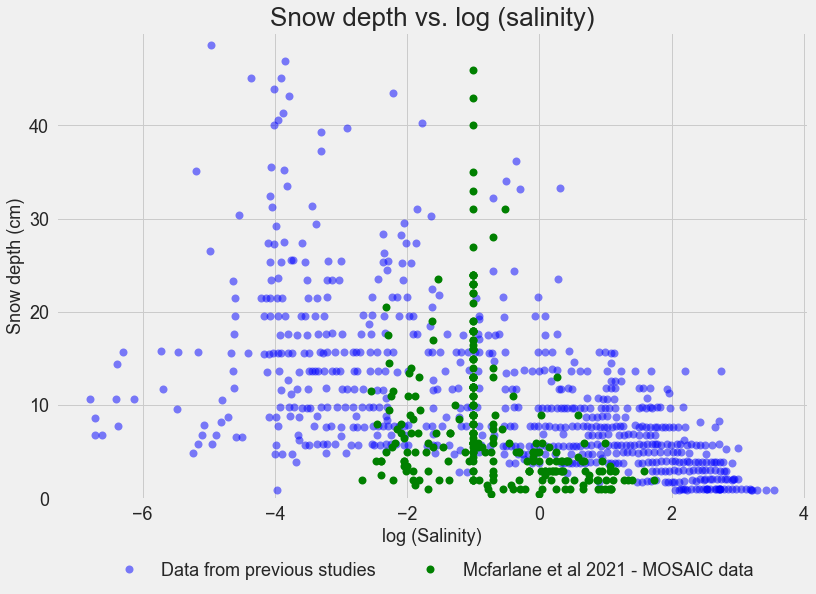

In [39]:
#plt.plot(confer_sp, confer_sd, 'grey','o')
# rewrite the ablve line  with grey dots
plt.figure(figsize = (12, 8))
plt.style.use('fivethirtyeight')
#plt.plot(confer_sp, confer_sd, 'b.', markersize=16, alpha=0.5,label = 'Data from previous studies')
plt.plot(np.log(confer_sp), confer_sd, 'b.', markersize=16, alpha=0.5,label = 'Data from previous studies')
plt.plot(np.log10(salinity_new),depth_new,'g.',markersize = 16, label = 'Mcfarlane et al 2021 - MOSAIC data')

# calculate linear fit to all data points
z = np.polyfit(np.log10(all_sp_20), all_sd_20, 1)
p = np.poly1d(z)

log_sp_fine = np.linspace(-6,4,100)
#plt.plot(np.log10(all_sp),p(np.log10(all_sp)),'r-', label = 'Linear fit to all data points')
#plt.plot(log_sp_fine,p(log_sp_fine),'r-', label = 'Linear fit to all data points')


# set x axis to log scale
#plt.xscale('log')
plt.ylim(0, 50)
plt.yticks(np.arange(0, 50, 10), fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlabel('log (Salinity)', fontsize = 18)
plt.ylabel('Snow depth (cm)', fontsize = 18)
plt.title('Snow depth vs. log (salinity)', fontsize = 26)
plt.grid(True)
# add legend to the bottom of the plot below the x axis and xlabel 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5, fontsize = 18)






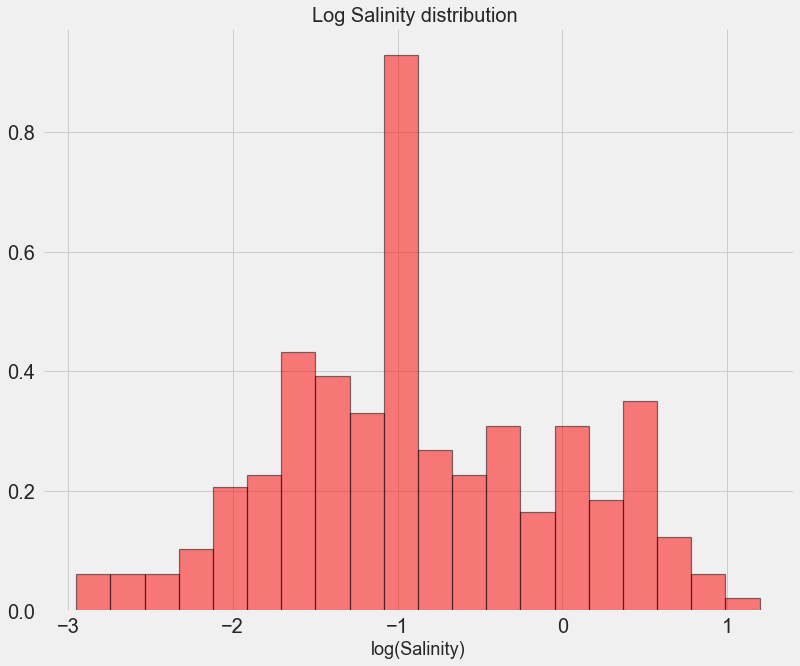

In [41]:
# histogram plot of snowdepth on y axis and salinity on x axis
flag = (all_sd>10) & (all_sd<20)
salinity_2 = all_sp[flag]
plt.figure(figsize=(12,10))
plt.style.use('fivethirtyeight')
plt.hist(np.log10(salinity_2),bins = 20, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)
#plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Log Salinity distribution ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
#plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)

# save allsp and allsd to csv file
all_data = np.vstack((all_sp, all_sd)).T
np.savetxt('all_data.csv', all_data, delimiter=',')

# Fit Normal distribution to the data 

Text(0, 0.5, 'Prabability density')

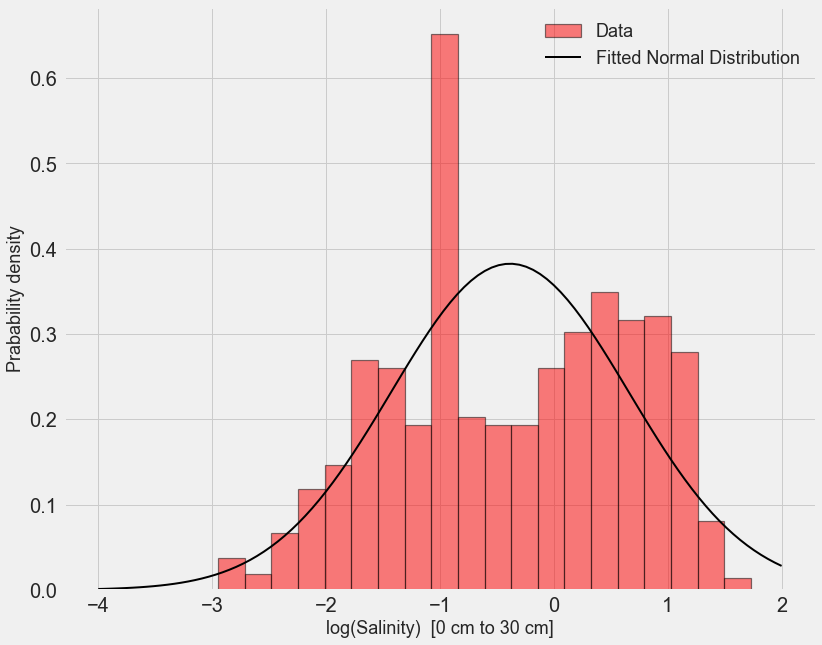

In [44]:
# histogram plot of snowdepth on y axis and salinity on x axis
from scipy.stats import norm, shapiro

bin1 = 0
bin2 = 30

flag = (all_sd>bin1) & (all_sd<bin2)
salinity_2 = all_sp[flag]
plt.figure(figsize=(12,10))
plt.style.use('fivethirtyeight')
plt.hist(np.log10(salinity_2),bins = 20, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)

mean, std = norm.fit(np.log10(salinity_2))
x = np.linspace(-4, 2, 100)
pdf_fitted = norm.pdf(x, mean, std)

# estimate the p value using the Kolmogorov-Smirnov test
p_value = kstest(np.log10(salinity_2), 'norm', args=(mean, std))[1]
stat, p = normaltest(np.log10(salinity_2))

stats, p_shapiro = shapiro(np.log10(salinity_2))

#p_value = np.round(p_value, 3)
flag = ''

"""

if p_value > 0.05:
    flag2 = 'good fit'

else:
    flag2 = 'bad fit'

"""

if p_value > 0.05:
    flag2 = 'bad fit'
else:
    flag2 = 'good fit'


plt.plot(x, pdf_fitted, 'k-', linewidth = 2, label = 'Fitted Normal Distribution')
plt.legend(fontsize = 18)

#plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
title_name = f'p value = {p_value} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)} '
title_name = ''

plt.title(title_name,fontsize = 20)
plt.xlabel(f'log(Salinity)  [{bin1} cm to {bin2} cm]',fontsize = 18)
plt.ylabel('Prabability density',fontsize = 18)
#plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)
#plt.yscale('log')


#plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

In [47]:
print(f'mean = {mean}, std = {std}')

mean = -0.3849450197459835, std = 1.0431397494847643


# Code to check fits at multiple snow depths

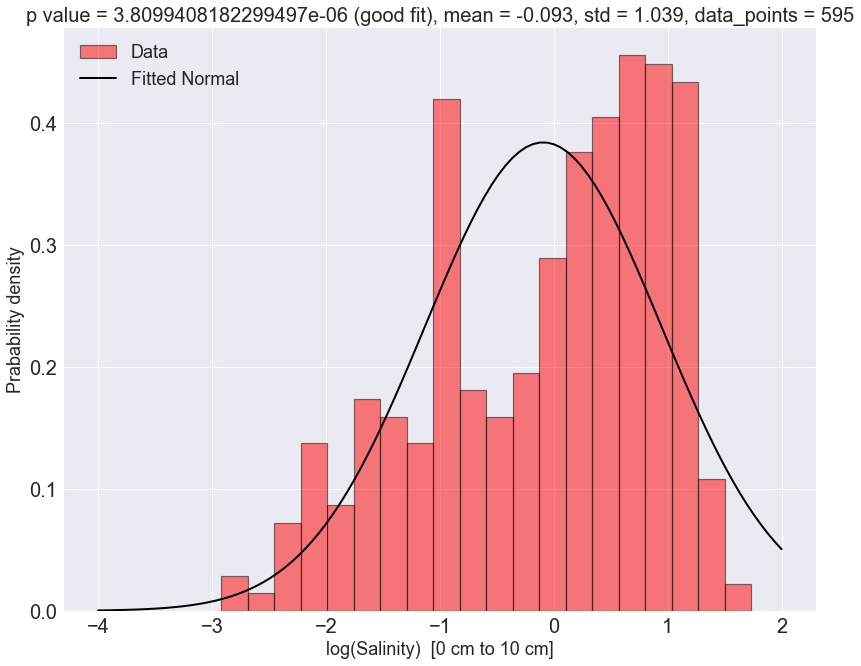

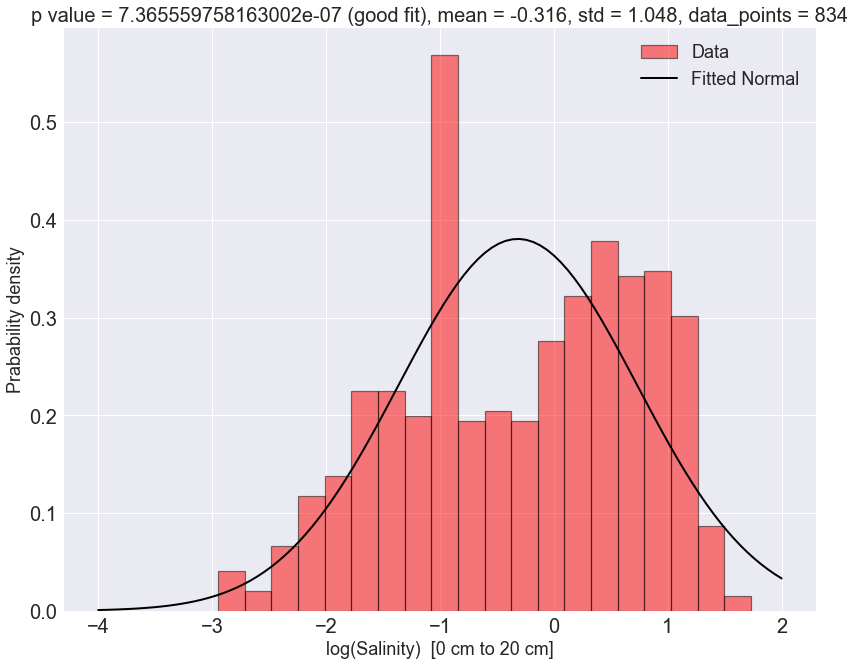

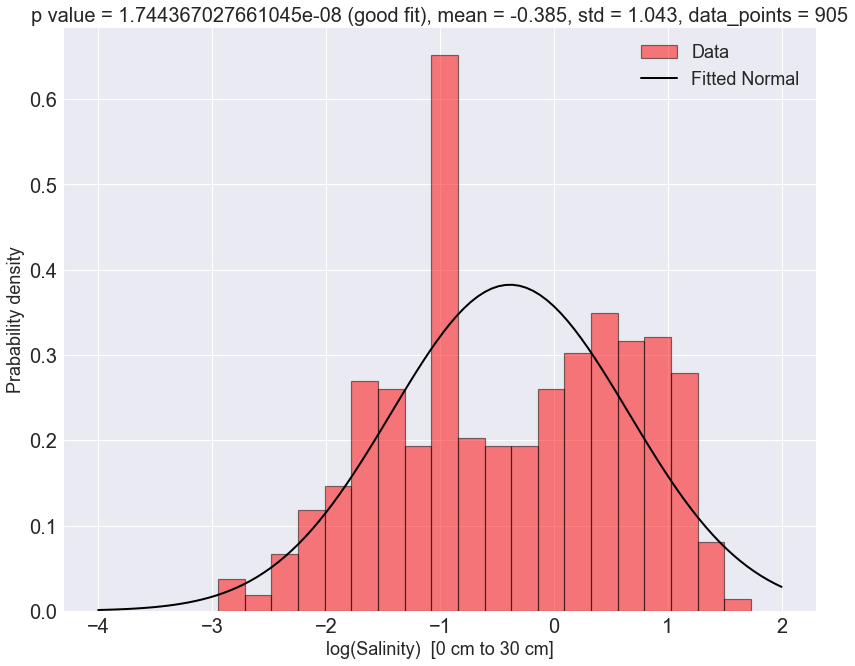

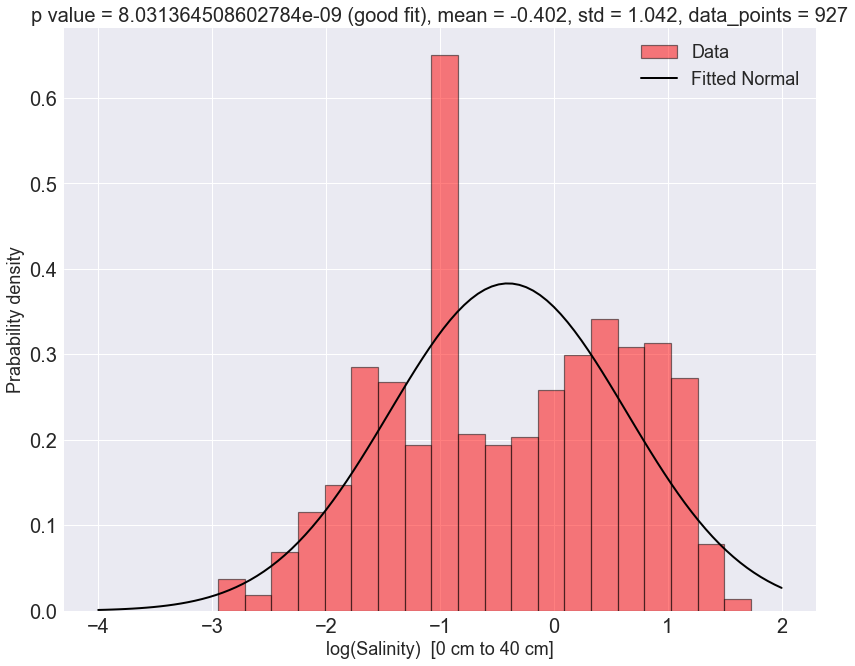

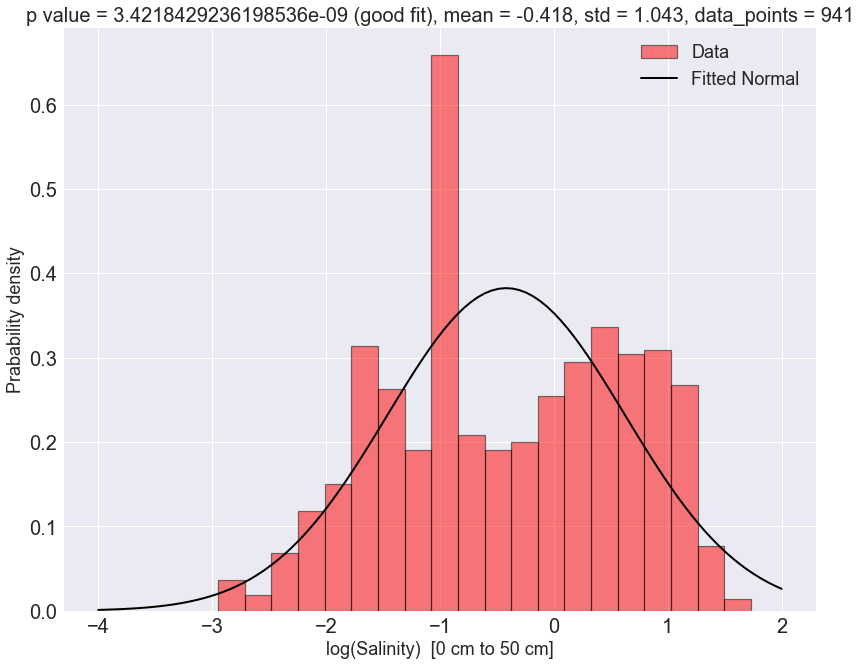

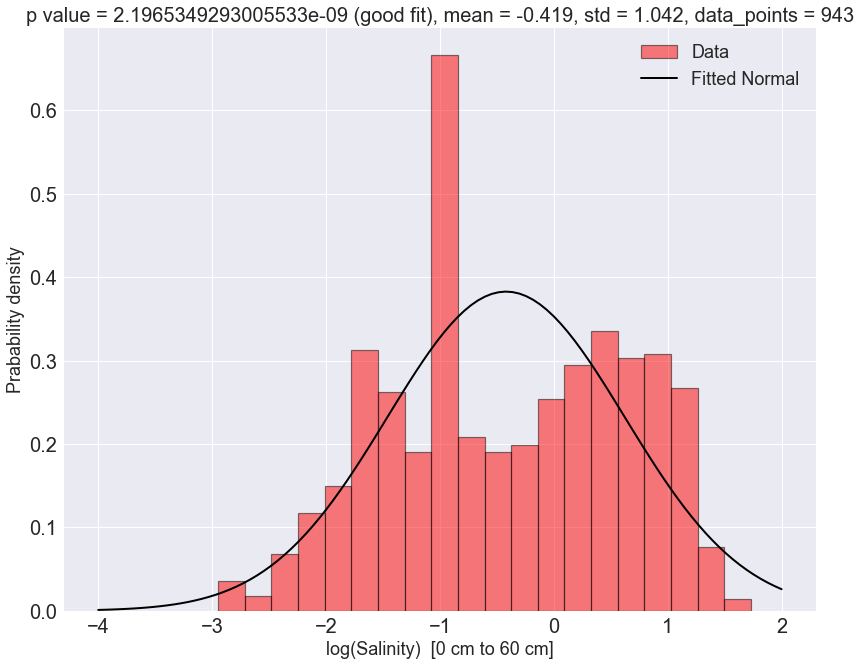

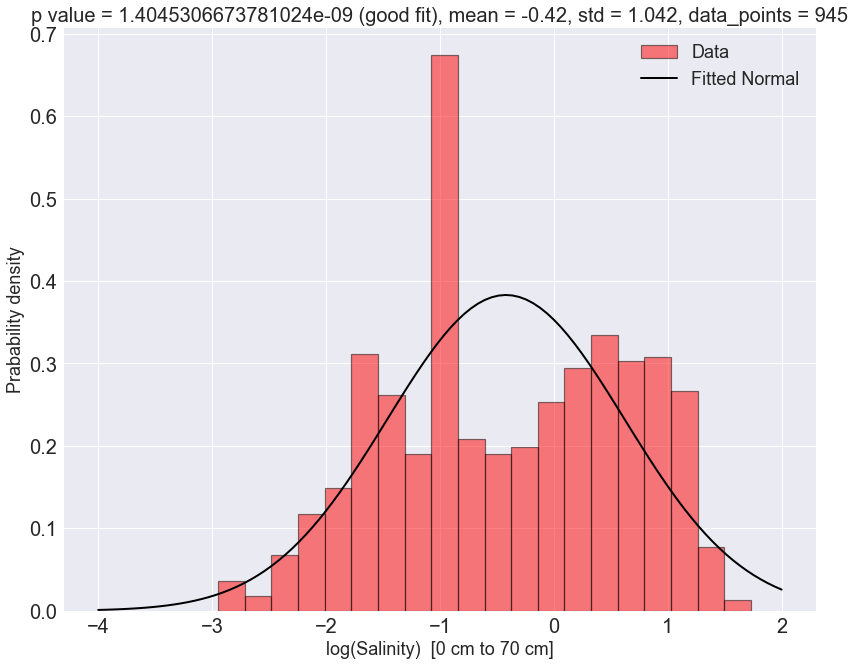

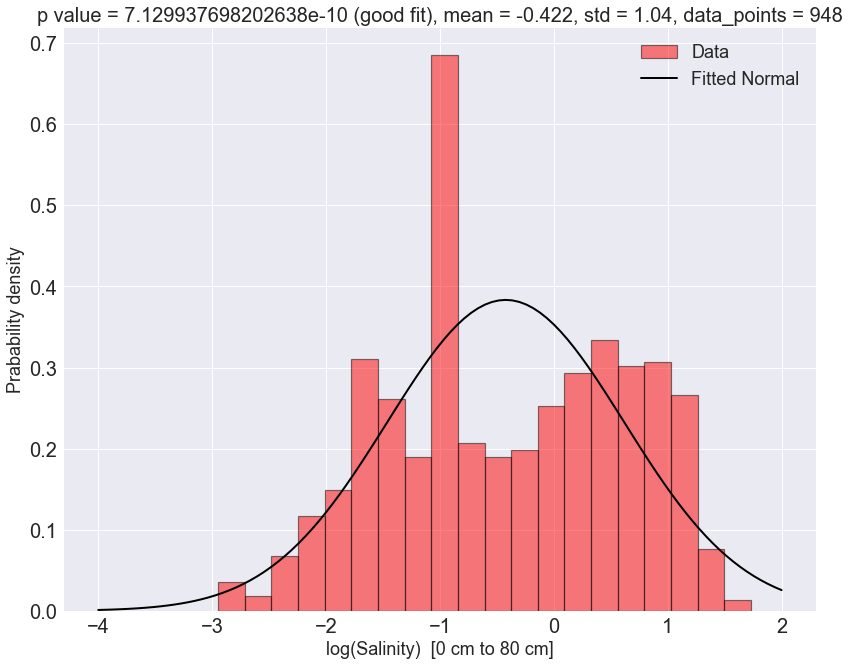

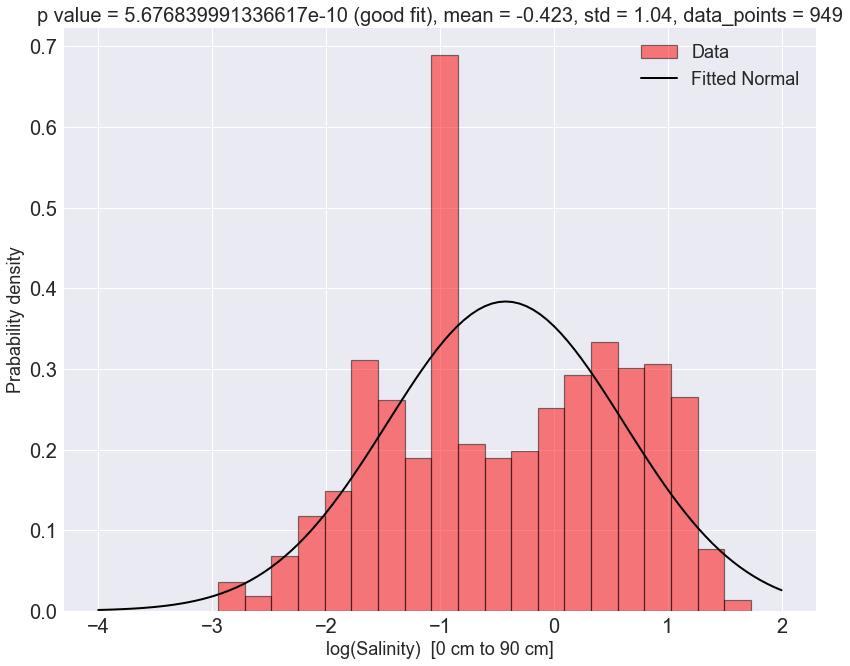

In [22]:
bin_limits = [(0, (i+1)*10) for i in range(9)]
#bin_limits = [(0,20), (20,100)]

for bin1, bin2 in bin_limits:
    #bin1 = 0
    #bin2 = 10

    flag = (all_sd>bin1) & (all_sd<bin2)
    salinity_2 = all_sp[flag]
    # count number of data points 
    n = len(salinity_2)

    plt.figure(figsize=(12,10))
    plt.style.use('seaborn')
    plt.hist(np.log10(salinity_2),bins = 20, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)

    
    mean, std = norm.fit(np.log10(salinity_2))
    x = np.linspace(-4, 2, 100)
    pdf_fitted = norm.pdf(x, mean, std)

    # estimate the p value using the Kolmogorov-Smirnov test
    #p_value = kstest(np.log10(salinity_2), 'norm', args=params)[1]
    #stat, p = normaltest(np.log10(salinity_2))

    p_value = kstest(np.log10(salinity_2), 'norm', args=(mean, std))[1]
    stat, p = normaltest(np.log10(salinity_2))

    #p_value = np.round(p_value, 3)
    flag = ''

    if p_value > 0.05:
        flag2 = 'bad fit'
    else:
        flag2 = 'good fit'

    plt.plot(x, pdf_fitted, 'k-', linewidth = 2, label = 'Fitted Normal')
    plt.legend(fontsize = 18)

    #plt.colorbar()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title(f'p value = {p_value} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)}, data_points = {n}',fontsize = 20)
    #plt.title(f'p value = {p} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)} ',fontsize = 20)
    plt.xlabel(f'log(Salinity)  [{bin1} cm to {bin2} cm]',fontsize = 18)
    plt.ylabel('Prabability density',fontsize = 18)
    #plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)
    #plt.yscale('log')


    #plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

# Code to plot the distributions for each snow depth bin

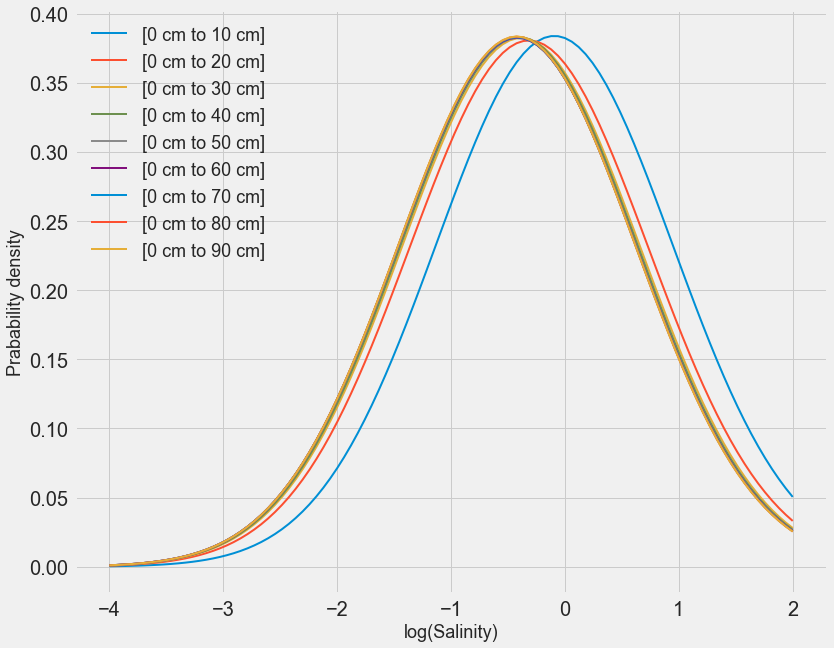

In [28]:
bin_limits = [(0, (i+1)*10) for i in range(9)]
#bin_limits = [(0,20), (20,100)]
plt.figure(figsize=(12,10))
plt.style.use('fivethirtyeight')
mean_arr = np.array([])
std_arr = np.array([])
for bin1, bin2 in bin_limits:
    #bin1 = 0
    #bin2 = 10

    flag = (all_sd>bin1) & (all_sd<bin2)
    salinity_2 = all_sp[flag]
    # count number of data points 
    n = len(salinity_2)

   
    
    #plt.hist(np.log10(salinity_2),bins = 20, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)

    
    mean, std = norm.fit(np.log10(salinity_2))
    mean_arr = np.append(mean_arr, mean)
    std_arr = np.append(std_arr, std)
    
    x = np.linspace(-4, 2, 100)
    pdf_fitted = norm.pdf(x, mean, std)

    # estimate the p value using the Kolmogorov-Smirnov test
    #p_value = kstest(np.log10(salinity_2), 'norm', args=params)[1]
    #stat, p = normaltest(np.log10(salinity_2))

    p_value = kstest(np.log10(salinity_2), 'norm', args=(mean, std))[1]
    stat, p = normaltest(np.log10(salinity_2))

    #p_value = np.round(p_value, 3)
    flag = ''

    if p_value > 0.05:
        flag2 = 'bad fit'
    else:
        flag2 = 'good fit'

    plt.plot(x, pdf_fitted, linewidth = 2, label = f'[{bin1} cm to {bin2} cm]')
    
    #plt.colorbar()
   
    #plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)
    #plt.yscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.title(f'p value = {p_value} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)}, data_points = {n}',fontsize = 20)
#plt.title(f'p value = {p} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)} ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
plt.ylabel('Prabability density',fontsize = 18)
plt.legend(fontsize = 18)

    #plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

In [33]:
# combine mean arr and std arr
mean_std_arr = np.array([mean_arr, std_arr]).T
# save the mean and std array as a csv file
np.savetxt('mean_std_arr.csv', mean_std_arr, delimiter = ',')



Statistics=4.494, p=0.106
Sample looks like a normal distribution(fail to reject H0)


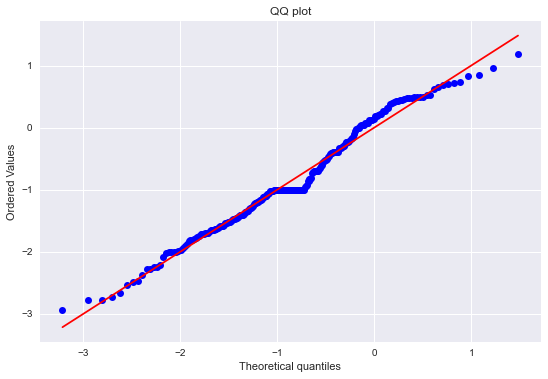

In [22]:
# making a qq plot
import scipy.stats as stats
fig, ax = plt.subplots()
stats.probplot(np.log10(salinity_2), dist=dist, sparams=params, plot = ax)
ax.set_title('QQ plot')
# is it a normal distribution?
stat, p = normaltest(np.log10(salinity_2))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks like a normal distribution(fail to reject H0)')
else:
    print('Sample does not look like a normal distribution (reject H0)')
    
plt.show()

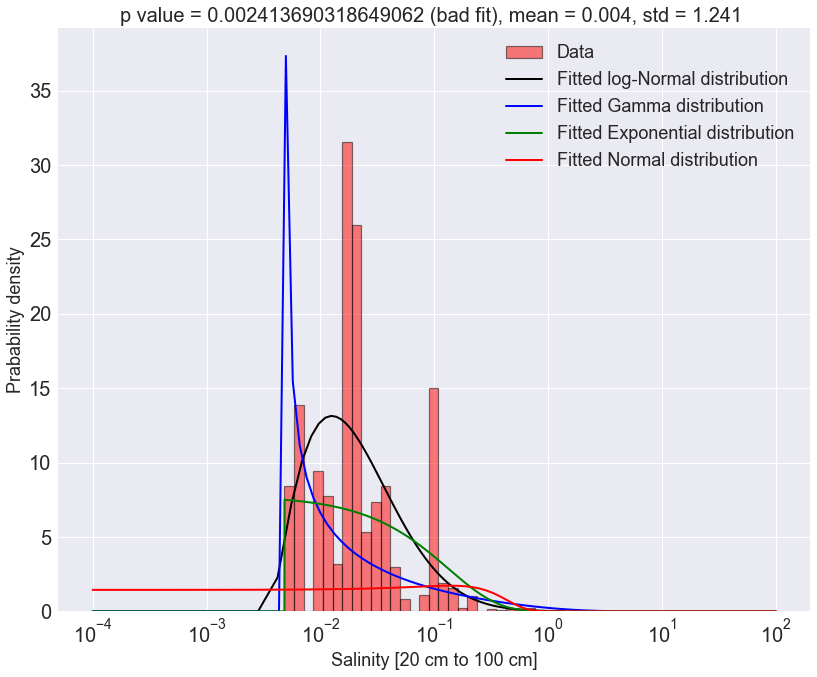

In [32]:
# instead of log salinity, use salinity

# histogram plot of snowdepth on y axis and salinity on x axis
from scipy.stats import norm, lognorm, truncnorm

bin1 = 20
bin2 = 100

flag = (all_sd>bin1) & (all_sd<bin2)
salinity_2 = all_sp[flag]
plt.figure(figsize=(12,10))
plt.style.use('seaborn')

logbins = np.logspace(np.log10(salinity_2.min()), np.log10(salinity_2.max()), 30)

plt.hist(salinity_2,bins = logbins, color = 'r', alpha = 0.5, edgecolor = 'k', label = 'Data', linewidth = 1.2, density = True)

params = lognorm.fit(salinity_2)
x = np.linspace(0.0001, salinity_2.max(), 1000)
pdf_fitted = lognorm.pdf(x, *params)

"""

# estimate the p value using the Kolmogorov-Smirnov test
p_value = kstest(salinity_2, 'norm', args=(mean, std))[1]
stat, p = normaltest(salinity_2)

p_value = np.round(p_value, 3)
flag = ''

if p_value > 0.05:
    flag2 = 'good fit'

else:
    flag2 = 'bad fit'

if p > 0.05:
    flag2 = 'good fit'
else:
    flag2 = 'bad fit'

"""

plt.plot(x, pdf_fitted, 'k-', linewidth = 2, label = 'Fitted log-Normal distribution')

# calculate the pvalue to see if the fit is a good fit for a lognormal distribution
p = kstest(salinity_2, 'lognorm', args=params)[1]

flag2 = ''

if p > 0.05:
    flag2 = 'good fit'
else:
    flag2 = 'bad fit'

# fit a gamma distribution to the data
from scipy.stats import gamma
params = gamma.fit(salinity_2)
x = np.logspace(-4, 2, 100)
pdf_fitted = gamma.pdf(x, *params)

plt.plot(x, pdf_fitted, 'b-', linewidth = 2, label = 'Fitted Gamma distribution')

# fit an exponential distribution to the data
from scipy.stats import expon
params = expon.fit(salinity_2)
x = np.logspace(-4, 2, 10000)
pdf_fitted = expon.pdf(x, *params)

plt.plot(x, pdf_fitted, 'g-', linewidth = 2, label = 'Fitted Exponential distribution')

# fit a normal distribution to the data
from scipy.stats import norm
params = norm.fit(salinity_2)
x = np.logspace(-4, 2, 100)
pdf_fitted = norm.pdf(x, *params)

plt.plot(x, pdf_fitted, 'r-', linewidth = 2, label = 'Fitted Normal distribution')





plt.legend(fontsize = 18)

#plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(f'p value = {p} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)} ',fontsize = 20)
plt.xlabel(f'Salinity [{bin1} cm to {bin2} cm]',fontsize = 18)
plt.ylabel('Prabability density',fontsize = 18)
#plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)
#plt.yscale('log')
plt.xscale('log')

#plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

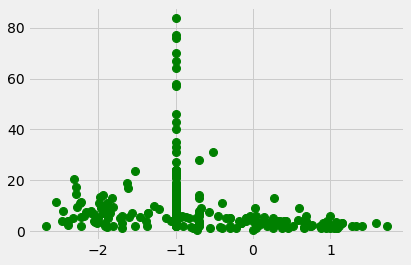

In [9]:
#z = np.polyfit(np.log10(salinity_new), depth_new, 5)
#p = np.poly1d(z)
# are any data in depth_new nan? or salinity_new  = 0
flag1 = salinity_new != 0
flag2 = depth_new != np.nan

flag_new = flag1 & flag2
depth_new = depth_new[flag_new]
salinity_new = salinity_new[flag_new]

# calculate linear fit to all data points
z = np.polyfit(np.log10(salinity_new), depth_new, 1)
p = np.poly1d(z)    

plt.plot(np.log10(salinity_new),depth_new,'g.',markersize = 16, label = 'markus MOSAIC data')

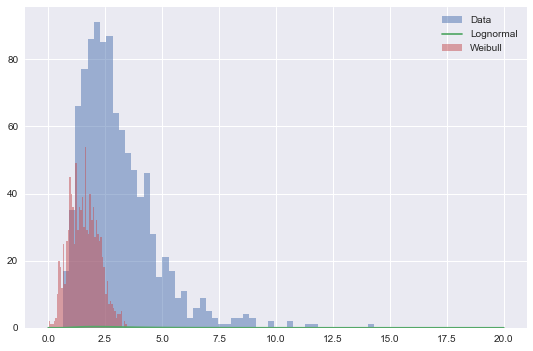

In [34]:
import numpy as np
from scipy.stats import weibull_min, lognorm

# Generate some random data that looks like a lognormal distribution
data = np.random.lognormal(mean=1, sigma=0.5, size=1000)

# Fit a lognormal distribution to the data for comparison
lognorm_fit = lognorm.fit(data)

# Calculate the mean and standard deviation of the logarithm of the data
log_mean = np.mean(np.log(data))
log_std = np.std(np.log(data))

# Calculate the shape and scale parameters for a Weibull distribution that matches the lognormal distribution
weibull_shape = lognorm_fit[2]
weibull_scale = np.exp(lognorm_fit[0]) / weibull_min.ppf(0.5, c=weibull_shape) ** (1 / weibull_shape)
# where ppf(0.5) returns the median value of the Weibull distribution

# Generate a Weibull distribution with the calculated shape and scale parameters
weibull_data = weibull_min.rvs(c=weibull_shape, scale=weibull_scale, size=1000)

# Plot the original data, the lognormal distribution, and the Weibull distribution
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(data, bins=50, alpha=0.5, label='Data')
x = np.linspace(0, 20, 100)
ax.plot(x, lognorm.pdf(x, *lognorm_fit), label='Lognormal')
ax.hist(weibull_data, bins=50, alpha=0.5, label='Weibull')
ax.legend()
plt.show()


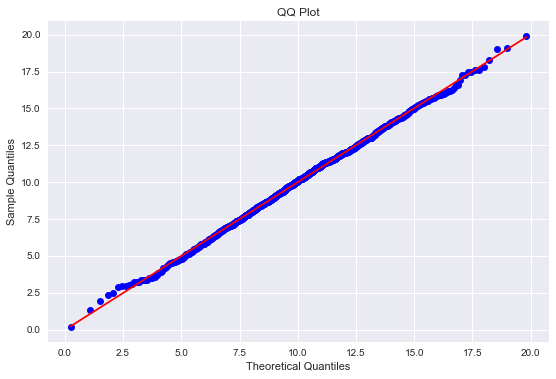

In [40]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate some random data
data = np.random.normal(loc=10, scale=3, size=1000)

# Fit a distribution to the data
dist = stats.norm
params = dist.fit(data)

# Make a QQ plot
fig, ax = plt.subplots()
stats.probplot(data, dist=dist, sparams=params, plot=ax)
ax.set_title('QQ Plot')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
plt.show()


In [41]:
params

(10.027962578495078, 3.059118557601781)

The data was not drawn from the fitted distribution


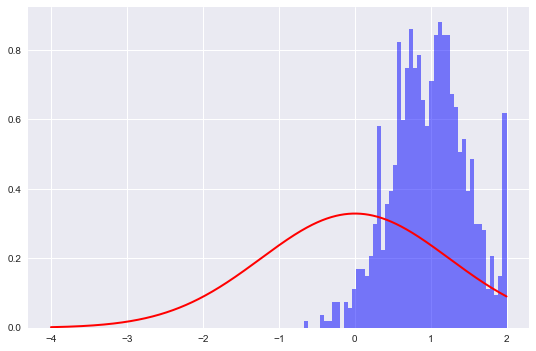

f(x) = 0.32148053348779754 * exp(-0.5 * ((x - 0.004212426784125667) / 1.2409531490856986)**2) / I(-10.0, 2.0)(x)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Generate some sample data
data = np.random.normal(1, 0.5, 1000)
data = np.clip(data, -4, 2)

# Plot the histogram of the data
plt.hist(data, bins=50, density=True, alpha=0.5, color='b')

# Fit a truncated normal distribution to the data
a, b = (-4 - 1) / 0.5, (2 - 1) / 0.5
params = truncnorm.fit(data, a, b)
mean, std = params[2], params[3]

# Generate the pdf of the fitted distribution
x = np.linspace(-4, 2, 1000)
pdf_fitted = truncnorm.pdf(x, a, b, mean, std)


# pvalue to test if data was drawn from this distribution
from scipy import stats
pvalue = stats.kstest(data, 'truncnorm', args=(a, b, mean, std))[1]

if pvalue < 0.05:
    print('The data was not drawn from the fitted distribution')
else:
    print('The data was drawn from the fitted distribution')



# Plot the fitted distribution
plt.plot(x, pdf_fitted, 'r-', linewidth=2)

# Show the plot
plt.show()

# output the mathematical expressuion of the fitted distribution
print(f'f(x) = {1 / (std * np.sqrt(2 * np.pi))} * exp(-0.5 * ((x - {mean}) / {std})**2) / I{a, b}(x)')


# plot of a lognormal distribution 


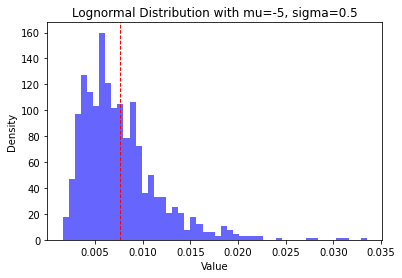

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set mean and standard deviation of the lognormal distribution
mu, sigma = -5, 0.5

# Generate 1000 random values from the lognormal distribution
samples = np.random.lognormal(mu, sigma, 1000)

# Plot a histogram of the samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='b')

# Add a vertical line at the mean of the distribution
plt.axvline(np.mean(samples), color='r', linestyle='dashed', linewidth=1)

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Lognormal Distribution with mu={mu}, sigma={sigma}')

# Show the plot
plt.show()


In [7]:
np.min(samples)

0.001598619765125888

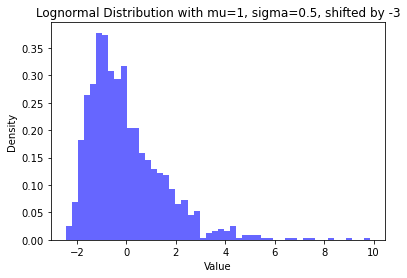

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set mean and standard deviation of the lognormal distribution
mu, sigma = 1, 0.5

# Generate 1000 random values from the lognormal distribution
samples = np.random.lognormal(mu, sigma, 1000)

# Shift the distribution by a constant to make it negative
shift = 3
samples = samples - shift

# Plot a histogram of the shifted distribution
plt.hist(samples, bins=50, density=True, alpha=0.6, color='b')

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Lognormal Distribution with mu=1, sigma=0.5, shifted by -3')

# Show the plot
plt.show()


/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


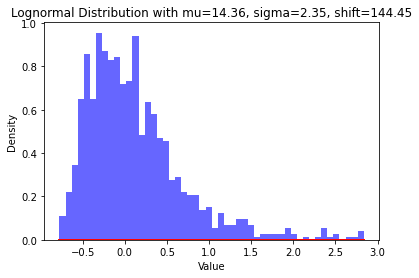

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the lognormal distribution function with shift
def lognormal(x, mu, sigma, shift):
    return np.exp(-(np.log(x+shift)-mu)**2/(2*sigma**2))/(x+shift)/sigma/np.sqrt(2*np.pi)

# Generate some sample data
data = np.random.lognormal(0, 0.5, 1000) - 1

# Set initial guesses for the parameters
mu_0 = np.mean(np.log(data+1))
sigma_0 = np.std(np.log(data+1))
shift_0 = 1

# Fit the lognormal distribution to the data
popt, pcov = curve_fit(lognormal, data, np.zeros_like(data), p0=[mu_0, sigma_0, shift_0], bounds=([-np.inf, 0, -np.inf], [np.inf, np.inf, np.inf]))

# Get the optimized parameters
mu, sigma, shift = popt

# Generate values from the fitted lognormal distribution
x = np.linspace(np.min(data), np.max(data), 1000)
y = lognormal(x, mu, sigma, shift)

# Plot the data and fitted lognormal distribution
plt.hist(data, bins=50, density=True, alpha=0.6, color='b')
plt.plot(x, y, 'r', linewidth=2)

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Lognormal Distribution with mu={mu:.2f}, sigma={sigma:.2f}, shift={shift:.2f}')

# Show the plot
plt.show()


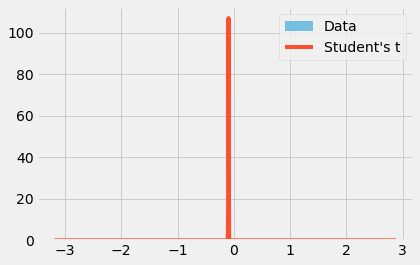

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.optimize import curve_fit

# Generate sample data
data = np.random.normal(loc=0, scale=1, size=1000)

# Define the PDF of the Student's t distribution
def t_pdf(x, df, mu, sigma):
    return t.pdf(x, df=df, loc=mu, scale=sigma)

# Define the histogram bins
bins = np.linspace(data.min(), data.max(), 50)

# Compute the histogram counts
hist_counts, _ = np.histogram(data, bins=bins)

# Fit the Student's t distribution to the data using curve_fit and optimize the parameters
params_t, _ = curve_fit(t_pdf, bins[:-1], hist_counts, p0=[1, np.mean(data), np.std(data)])

# Plot the histogram of the data and the fitted distribution
plt.hist(data, bins=50, density=True, alpha=0.5, label="Data")

x = np.linspace(data.min(), data.max(), 1000)
plt.plot(x, t_pdf(x, *params_t), label="Student's t")

plt.legend()
plt.show()